In [36]:
import pandas as pd
d=pd.read_csv("/content/Ethereum_Dataset.csv")

In [37]:
print(d)

            Open         High          Low        Close    Adj_Close  \
0    3095.271729  3265.336914  3000.908203  3001.120117  3001.120117   
1    3002.956787  3029.081055  2496.812988  2557.931641  2557.931641   
2    2561.145264  2615.247314  2330.247314  2405.181152  2405.181152   
3    2406.924316  2542.144775  2381.515137  2535.039063  2535.039063   
4    2535.891113  2537.208496  2172.301270  2440.352295  2440.352295   
..           ...          ...          ...          ...          ...   
361  1552.519287  1594.039795  1529.573608  1576.833496  1576.833496   
362  1577.107422  1594.000977  1553.335938  1567.846069  1567.846069   
363  1567.698975  1602.106689  1509.422852  1515.506958  1515.506958   
364  1515.249634  1557.970337  1514.380005  1552.556519  1552.556519   
365  1550.773193  1559.552490  1545.327393  1545.741333  1545.741333   

          Volume  
0    10645922764  
1    26796291874  
2    27369692036  
3    16481489511  
4    28220804648  
..           ...  
36

In [38]:
print(d.isna())

      Open   High    Low  Close  Adj_Close  Volume
0    False  False  False  False      False   False
1    False  False  False  False      False   False
2    False  False  False  False      False   False
3    False  False  False  False      False   False
4    False  False  False  False      False   False
..     ...    ...    ...    ...        ...     ...
361  False  False  False  False      False   False
362  False  False  False  False      False   False
363  False  False  False  False      False   False
364  False  False  False  False      False   False
365  False  False  False  False      False   False

[366 rows x 6 columns]


In [39]:
d1=d.fillna(0)

In [40]:
from matplotlib import pyplot as pt

In [41]:
x=d['Open']
y=d['High']

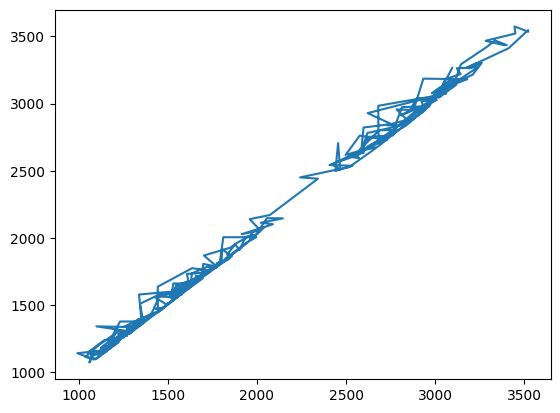

In [42]:
pt.plot(x,y)

In [43]:
a=d['Low']
b=d['Close']

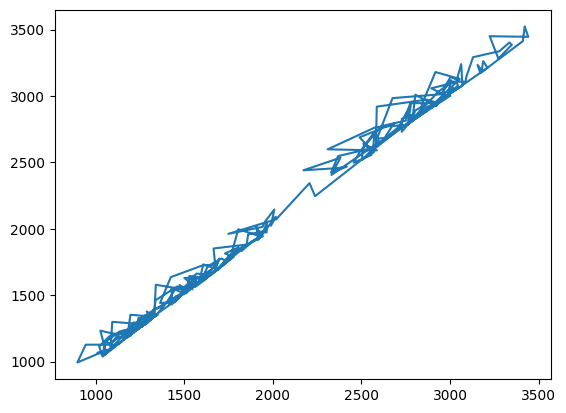

In [44]:
pt.plot(a,b)

In [45]:
e=d['Adj_Close']
f=d['Volume']

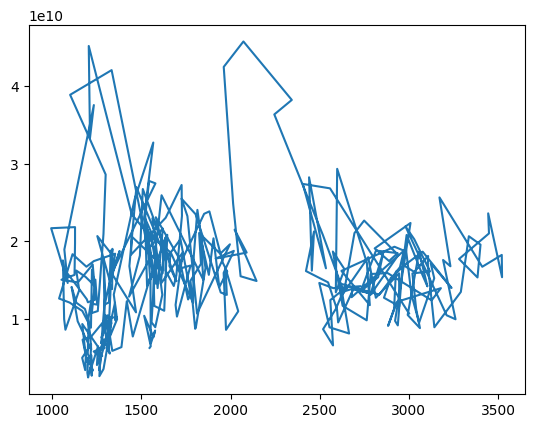

In [46]:
pt.plot(e,f)

In [47]:
d.corr()

,Open,High,Low,Close,Adj_Close,Volume
Open,1.000000,0.997630,0.995650,0.992719,0.992719,0.212433
High,0.997630,1.000000,0.995529,0.996368,0.996368,0.230708
Low,0.995650,0.995529,1.000000,0.997083,0.997083,0.162994
Close,0.992719,0.996368,0.997083,1.000000,1.000000,0.189709
Adj_Close,0.992719,0.996368,0.997083,1.000000,1.000000,0.189709
Volume,0.212433,0.230708,0.162994,0.189709,0.189709,1.000000


In [48]:
d.cov()

,Open,High,Low,Close,Adj_Close,Volume
Open,5.105209e+05,5.215470e+05,4.951278e+05,5.050077e+05,5.050077e+05,1.078814e+12
High,5.215470e+05,5.353455e+05,5.069611e+05,5.190413e+05,5.190413e+05,1.199770e+12
Low,4.951278e+05,5.069611e+05,4.844035e+05,4.940828e+05,4.940828e+05,8.062947e+11
Close,5.050077e+05,5.190413e+05,4.940828e+05,5.069090e+05,5.069090e+05,9.599977e+11
Adj_Close,5.050077e+05,5.190413e+05,4.940828e+05,5.069090e+05,5.069090e+05,9.599977e+11
Volume,1.078814e+12,1.199770e+12,8.062947e+11,9.599977e+11,9.599977e+11,5.051671e+19


In [51]:

x = d.iloc[:, :-1].values
y = d.iloc[:, -1].values
print(x.shape,y.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
print(x_train)
print(y_train)

(366, 5) (366,)
[[3031.060791 3118.387695 3012.32666  3108.062012 3108.062012]
 [1469.705444 1469.705444 1331.494751 1335.329102 1335.329102]
 [1107.895996 1136.442627 1081.138184 1135.173462 1135.173462]
 ...
 [2022.882324 2113.059814 2015.971558 2090.40918  2090.40918 ]
 [2497.721436 2618.166016 2489.755127 2576.747559 2576.747559]
 [1168.139038 1169.193848 1095.002808 1097.236572 1097.236572]]
[18070503166 15762284723 12040670755  5672609405 18461527259  6032859783
 18629485080 45162788786 37539999450 13292477213  7599462786  4091530737
  5483308196 17168141904  7491625206 19974623205 11006973190 16043881065
 15637578930 22946059125 16841424404  8850385937 21459552191 13431866834
 14878001811 13194846235  7990438824 12492225250 10964962767 16688640823
  9466018022 14818795695 33327826525  5174128454 12464301922 26713710143
 13026093219  6314904311 11757911705 19306919714  6798512624 27440420623
 11939561598 21795481981 17708478709 21891804831 26796291874 15010593493
 14666227351 174

Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,classification_report,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
##pt.scatter(x_train,y_train)
#pt.plot(x_test, model.predict(x_test), color = 'blue')
#pt.show()


In [54]:
print(y_pred)

[1.29795606e+10 1.03126207e+10 1.40868204e+10 2.59244427e+10
 1.36039946e+10 1.00096283e+10 1.29234393e+10 1.00939320e+10
 1.24575902e+10 2.93797008e+10 1.63024013e+10 1.71549651e+10
 1.12948154e+10 1.56232087e+10 1.16661963e+10 1.07511953e+10
 2.85511733e+10 1.37553749e+10 1.79700056e+10 1.06518591e+10
 2.03198830e+10 1.11396145e+10 1.42979493e+10 2.71326593e+10
 1.02016645e+10 9.80941018e+09 1.46959574e+10 9.46784242e+09
 2.28149654e+10 1.15335002e+10 1.17498761e+10 1.14498178e+10
 2.98152585e+10 1.32610775e+10 1.64936548e+10 1.61638836e+10
 1.39579309e+10 2.09930347e+10 9.66941588e+09 1.19058940e+10
 1.46114825e+10 1.01748014e+10 1.63794648e+10 1.06228466e+10
 1.97533740e+10 1.24947075e+10 1.30901876e+10 1.35628571e+10
 1.21126007e+10 8.29614561e+09 1.28098041e+10 1.33242773e+10
 1.30465432e+10 1.13783650e+10 1.07664852e+10 1.87867239e+10
 1.21748838e+10 1.14103263e+10 1.12142345e+10 2.17842509e+10
 1.03476472e+10 1.08535199e+10 1.92906046e+10 1.31498309e+10
 1.45633748e+10 9.338388

In [55]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

1.886134092669566e+19


KNN

In [58]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

[1.22833407e+10 1.26673718e+10 1.49429881e+10 1.54902880e+10
 1.38284031e+10 4.38490145e+09 1.58937769e+10 5.04153299e+09
 1.73970542e+10 1.74068861e+10 1.45495977e+10 1.82095116e+10
 9.19587186e+09 2.03626007e+10 4.14255156e+09 1.86713173e+10
 1.46977515e+10 1.38325160e+10 1.89133986e+10 1.38954922e+10
 2.14329781e+10 1.68538595e+10 1.28672225e+10 1.21875303e+10
 4.38490145e+09 8.32735586e+09 1.96325995e+10 4.51567529e+09
 1.66164456e+10 1.60791187e+10 1.50095414e+10 1.48039111e+10
 1.65735180e+10 1.38325160e+10 1.11897801e+10 2.02664625e+10
 1.36673360e+10 2.14503664e+10 7.44696884e+09 1.57689057e+10
 1.53326780e+10 4.33723572e+09 1.71048551e+10 1.33987999e+10
 1.44837241e+10 1.50852695e+10 1.68522273e+10 1.59562575e+10
 1.73970542e+10 1.57689057e+10 1.46775786e+10 1.64406071e+10
 1.78622249e+10 1.53359775e+10 1.32881596e+10 1.30810574e+10
 1.36469415e+10 1.29753444e+10 1.35177538e+10 1.68215966e+10
 4.37701995e+09 8.50334321e+09 2.02664625e+10 1.31239195e+10
 1.20262423e+10 4.932707

SVM

In [62]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

[13876301217 16079711737 12382419582 15197063785 10427054790  5074160558
 17136080906  9723646871  7684148212 14594098731 16434529708 16368619692
 11802651633 10354880595  4977252792 17065041354 16981552654 13194846235
 15444626014  8850385937 26713710143 14200735370 13091199728 18907671369
  5074160558  5804676208 15302506131  5077258586 16434529708 11757911705
  8546822406 17419284041 19266124733  9774183169 16360200507 16481489511
 12164552172 23458681818  6857935276 17136080906 18363115560  3942720070
 17708478709 14250100093 13431866834 15386286815 13060541168 13060541168
  7684148212 12352406833 17499453625 23465074882 16368619692  9935603640
 16636517503 17208902048 14594098731 10642556101 18070503166 17685495686
  5089212680 16034549271 27369692036  9774183169 10153070907  2399674550
  9774183169 18734247914 23465074882  9651002684 15333808649  3942720070
 18509929297 17499038202]
5.77601409669906e+17


Decision Tree

[1.16414378e+10 1.60797117e+10 1.23824196e+10 1.60438811e+10
 1.04270548e+10 3.39297213e+09 1.71360809e+10 3.01851333e+09
 1.82385635e+10 1.46662274e+10 1.83631156e+10 1.42007354e+10
 5.80467621e+09 1.89261006e+10 4.00178646e+09 1.56375789e+10
 1.69815527e+10 9.77418317e+09 2.34650749e+10 8.85038594e+09
 2.29460591e+10 1.48187957e+10 9.05496356e+09 1.89076714e+10
 3.39297213e+09 5.80467621e+09 2.09829889e+10 4.94362809e+09
 8.54682241e+09 1.48187957e+10 1.87342479e+10 1.38763012e+10
 1.92661247e+10 9.77418317e+09 1.63602005e+10 1.64814895e+10
 1.21645522e+10 2.34586818e+10 6.85793528e+09 1.71360809e+10
 1.77409656e+10 4.83583192e+09 1.72178496e+10 1.30928202e+10
 1.71360809e+10 1.53862868e+10 1.78971502e+10 2.16181548e+10
 1.82385635e+10 1.71360809e+10 1.74994536e+10 2.34650749e+10
 2.72314000e+10 9.93560364e+09 1.60087677e+10 1.31948462e+10
 6.53299657e+09 1.24643019e+10 1.71360809e+10 1.04270548e+10
 5.08921268e+09 5.83017325e+09 2.82208046e+10 1.38763012e+10
 7.99043882e+09 4.055668

[Text(0.35195975221821374, 0.9736842105263158, 'x[1] <= 1368.584\nsquared_error = 5.393417848451904e+19\nsamples = 292\nvalue = 14975560019.284'),
 Text(0.13886078880655225, 0.9210526315789473, 'x[2] <= 1136.224\nsquared_error = 3.739985364088952e+19\nsamples = 103\nvalue = 10435994284.621'),
 Text(0.035101404056162244, 0.868421052631579, 'x[0] <= 1186.347\nsquared_error = 3.9341018355686244e+19\nsamples = 23\nvalue = 17590889672.522'),
 Text(0.027301092043681748, 0.8157894736842105, 'x[2] <= 976.106\nsquared_error = 9.4515440262028e+18\nsamples = 20\nvalue = 15740748256.2'),
 Text(0.02106084243369735, 0.7631578947368421, 'x[2] <= 919.613\nsquared_error = 4905277530308608.0\nsamples = 2\nvalue = 21725444294.5'),
 Text(0.01794071762870515, 0.7105263157894737, 'squared_error = 0.0\nsamples = 1\nvalue = 21655406608.0'),
 Text(0.02418096723868955, 0.7105263157894737, 'squared_error = 65536.0\nsamples = 1\nvalue = 21795481981.0'),
 Text(0.033541341653666144, 0.7631578947368421, 'x[1] <= 108

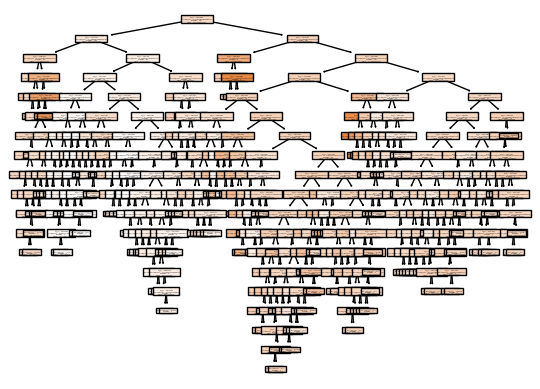

In [64]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
from sklearn import tree
tree.plot_tree(model,filled=True)